In [39]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, classification_report, roc_auc_score, make_scorer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [40]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML
df = pd.read_csv('train_eda.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML


In [41]:
df.shape

(542580, 199)

In [42]:
df.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dist1             0
P_emaildomain     0
R_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D3                0
D4                0
D5                0
D8                0
D9                0
D10               0
D11               0
D13               0
D14               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0


In [43]:
df.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D3                float64
D4                float64
D5                float64
D8                float64
D9                float64
D10               float64
D11               float64
D13         

In [44]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_31', 'id_32', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'OS_id_30',
       'version_id_30', 'DeviceCorp', 'hour_warning'],
      dtype='object')

In [45]:
df[categorical_columns].nunique()


ProductCD         5
card4             4
card6             3
P_emaildomain    19
R_emaildomain    10
M1                2
M2                2
M3                2
M4                3
M5                2
M6                2
M7                2
M8                2
M9                2
id_12             3
id_15             4
id_16             3
id_28             3
id_29             3
id_31            14
id_32             5
id_34             5
id_35             3
id_36             3
id_37             3
id_38             3
DeviceType        3
DeviceInfo       14
OS_id_30          8
version_id_30    43
DeviceCorp       33
hour_warning      4
dtype: int64

In [46]:
class_counts = df['isFraud'].value_counts()


total_samples = len(df)
percentage_fraud = (class_counts[1] / total_samples) * 100
percentage_non_fraud = (class_counts[0] / total_samples) * 100

print("Class Distribution:")
print("Fraud: {:.2f}%".format(percentage_fraud))
print("Non-Fraud: {:.2f}%".format(percentage_non_fraud))




Class Distribution:
Fraud: 3.45%
Non-Fraud: 96.55%


In [47]:
drop_cols = ['TransactionID', 'TransactionDT', 'isFraud']
X = df.drop(drop_cols, axis=1)
y = df["isFraud"]

numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Label Encode categorical features
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


In [48]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [49]:
def feature_importance(model, x_train):
  importance = model.feature_importances_
  feature_importance = pd.DataFrame(importance, index=x_train.columns, columns=['Importances'])
  return feature_importance.sort_values(by=['Importances'], ascending=False)

## Decision Tree


### Random Undersampling

In [ ]:
dt_model_rus = DecisionTreeClassifier(random_state=42)
dt_model_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(random_state=42)

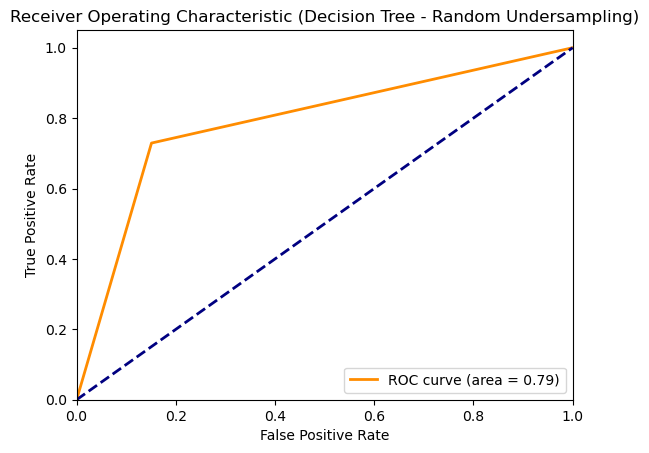

Decision Tree (Random Undersampling) - Train AUC-ROC Score: 1.0
Decision Tree (Random Undersampling) - Test AUC-ROC Score: 0.7890779708496058


In [ ]:
y_train_pred_dt_rus = dt_model_rus.predict(X_train_rus)


y_train_prob_dt_rus = dt_model_rus.predict_proba(X_train_rus)[:, 1]
roc_auc_train_dt_rus = roc_auc_score(y_train_rus, y_train_prob_dt_rus)


y_test_pred_dt_rus = dt_model_rus.predict(X_test)


y_test_prob_dt_rus = dt_model_rus.predict_proba(X_test)[:, 1]
roc_auc_test_dt_rus = roc_auc_score(y_test, y_test_prob_dt_rus)


fpr_dt_rus, tpr_dt_rus, _ = roc_curve(y_test, y_test_prob_dt_rus)
plt.figure()
plt.plot(fpr_dt_rus, tpr_dt_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_dt_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()


print("Decision Tree (Random Undersampling) - Train AUC-ROC Score:", roc_auc_train_dt_rus)
print("Decision Tree (Random Undersampling) - Test AUC-ROC Score:", roc_auc_test_dt_rus)

In [ ]:
precision_train_dt_rus = precision_score(y_train_rus, y_train_pred_dt_rus)
recall_train_dt_rus = recall_score(y_train_rus, y_train_pred_dt_rus)
precision_test_dt_rus = precision_score(y_test, y_test_pred_dt_rus)
recall_test_dt_rus = recall_score(y_test, y_test_pred_dt_rus)

In [ ]:
print("Decision Tree (Random Undersampling) - Train Precision:", precision_train_dt_rus)
print("Decision Tree (Random Undersampling) - Train Recall:", recall_train_dt_rus)
print("Decision Tree (Random Undersampling) - Test Precision:", precision_test_dt_rus)
print("Decision Tree (Random Undersampling) - Test Recall:", recall_test_dt_rus)

Decision Tree (Random Undersampling) - Train Precision: 1.0
Decision Tree (Random Undersampling) - Train Recall: 1.0
Decision Tree (Random Undersampling) - Test Precision: 0.14729350873409533
Decision Tree (Random Undersampling) - Test Recall: 0.729116626634641


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred_dt_rus))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91    104769
           1       0.15      0.73      0.25      3747

    accuracy                           0.84    108516
   macro avg       0.57      0.79      0.58    108516
weighted avg       0.96      0.84      0.89    108516



### SMOTE

In [ ]:
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

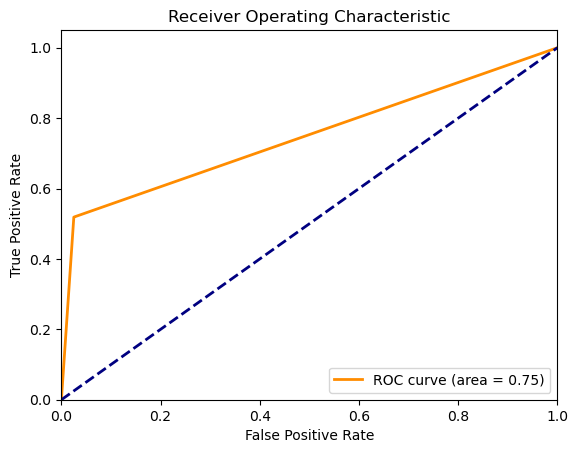

Decision Tree (SMOTE) - Train AUC-ROC Score: 0.9999999999772244
Decision Tree (SMOTE) - Test AUC-ROC Score: 0.74688721378653


In [ ]:
y_train_pred_smote = dt_model_smote.predict(X_train_smote)


y_train_prob_smote = dt_model_smote.predict_proba(X_train_smote)[:, 1]
train_roc_auc_smote = roc_auc_score(y_train_smote, y_train_prob_smote)


y_test_pred_smote = dt_model_smote.predict(X_test)


y_test_prob_smote = dt_model_smote.predict_proba(X_test)[:, 1]
test_roc_auc_smote = roc_auc_score(y_test, y_test_prob_smote)




fpr_smote, tpr_smote, _ = roc_curve(y_test, y_test_prob_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


print("Decision Tree (SMOTE) - Train AUC-ROC Score:", train_roc_auc_smote)
print("Decision Tree (SMOTE) - Test AUC-ROC Score:", test_roc_auc_smote)

In [ ]:
precision_train_dt_smote = precision_score(y_train_smote, y_train_pred_smote)
recall_train_dt_smote = recall_score(y_train_smote, y_train_pred_smote)
precision_test_dt_smote = precision_score(y_test, y_test_pred_smote)
recall_test_dt_smote = recall_score(y_test, y_test_pred_smote)

In [ ]:
print("Decision Tree (SMOTE) - Train Precision:", precision_train_dt_smote)
print("Decision Tree (SMOTE) - Train Recall:", recall_train_dt_smote)
print("Decision Tree (SMOTE) - Test Precision:", precision_test_dt_smote)
print("Decision Tree (SMOTE) - Test Recall:", recall_test_dt_smote)

Decision Tree (SMOTE) - Train Precision: 1.0
Decision Tree (SMOTE) - Train Recall: 0.9999904552374498
Decision Tree (SMOTE) - Test Precision: 0.4256623604116488
Decision Tree (SMOTE) - Test Recall: 0.5188150520416333


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred_smote))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    104769
           1       0.43      0.52      0.47      3747

    accuracy                           0.96    108516
   macro avg       0.70      0.75      0.72    108516
weighted avg       0.96      0.96      0.96    108516



### Hyperparemeter tuning

In [ ]:
dt_model_rus = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


rs_rus = RandomizedSearchCV(estimator=dt_model_rus, param_distributions=param_dist,
                            scoring='roc_auc', cv=5, n_iter=10, refit=True, random_state=42, n_jobs=-1)


rs_rus.fit(X_train_rus, y_train_rus)


print("Decision Tree (Random Undersampling) - Best Parameters:", rs_rus.best_params_)
print("Decision Tree (Random Undersampling) - Best Train AUC-ROC Score:", rs_rus.best_score_)


y_pred_rus = rs_rus.best_estimator_.predict(X_test)
y_prob_rus = rs_rus.best_estimator_.predict_proba(X_test)[:, 1]


test_roc_auc_rus = roc_auc_score(y_test, y_prob_rus)


print("Decision Tree (Random Undersampling) - Test AUC-ROC Score:", test_roc_auc_rus)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_rus))

Decision Tree (Random Undersampling) - Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree (Random Undersampling) - Best Train AUC-ROC Score: 0.863232170011371
Decision Tree (Random Undersampling) - Test AUC-ROC Score: 0.863156846621911
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    104769
           1       0.14      0.76      0.23      3747

    accuracy                           0.83    108516
   macro avg       0.56      0.79      0.57    108516
weighted avg       0.96      0.83      0.88    108516



In [ ]:
precision_rus = precision_score(y_test, y_pred_rus)
recall_rus = recall_score(y_test, y_pred_rus)
print("Decision Tree (Random Undersampling) - Precision Score:", precision_rus)
print("Decision Tree (Random Undersampling) - Recall Score:", recall_rus)

Decision Tree (Random Undersampling) - Precision Score: 0.13783205215529823
Decision Tree (Random Undersampling) - Recall Score: 0.7560715238857753


In [ ]:

dt_model_smote = DecisionTreeClassifier(random_state=42)


rs_smote = RandomizedSearchCV(estimator=dt_model_smote, param_distributions=param_dist,
                            scoring='roc_auc', cv=5, n_iter=10, refit=True, random_state=42, n_jobs=-1)


rs_smote.fit(X_train_smote, y_train_smote)


print("Decision Tree (SMOTE) - Best Parameters:", rs_smote.best_params_)
print("Decision Tree (SMOTE) - Best Train AUC-ROC Score:", rs_smote.best_score_)


y_pred_smote = rs_smote.best_estimator_.predict(X_test)


y_prob_smote = rs_smote.best_estimator_.predict_proba(X_test)[:, 1]
test_roc_auc_smote = roc_auc_score(y_test, y_prob_smote)




print("Decision Tree (SMOTE) - Test AUC-ROC Score:", test_roc_auc_smote)
print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_smote))

Decision Tree (SMOTE) - Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'}
Decision Tree (SMOTE) - Best Train AUC-ROC Score: 0.9672581171584295
Decision Tree (SMOTE) - Test AUC-ROC Score: 0.7969953012873701
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    104769
           1       0.55      0.46      0.50      3747

    accuracy                           0.97    108516
   macro avg       0.76      0.72      0.74    108516
weighted avg       0.97      0.97      0.97    108516



In [ ]:
precision_smt = precision_score(y_test, y_pred_smote)
recall_smt = recall_score(y_test, y_pred_smote)
print("Decision Tree (SMOTE) - Precision Score:", precision_smt)
print("Decision Tree (SMOTE) - Recall Score:", recall_smt)

Decision Tree (SMOTE) - Precision Score: 0.5468354430379747
Decision Tree (SMOTE) - Recall Score: 0.4611689351481185


## RandomForest

In [ ]:
rf_rus = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rus = rf_rus.predict(X_test)
y_prob_rus = rf_rus.predict_proba(X_test)[:, 1]
roc_auc_rus = roc_auc_score(y_test, y_prob_rus)


y_pred_smote = rf_smote.predict(X_test)
y_prob_smote = rf_smote.predict_proba(X_test)[:, 1]
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)


precision_rus = precision_score(y_test, y_pred_rus)
recall_rus = recall_score(y_test, y_pred_rus)

precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)

# random undersampling
print("Random Undersampling - Precision Score:", precision_rus)
print("Random Undersampling - Recall Score:", recall_rus)
print("Random Undersampling - AUC-ROC Score:", roc_auc_rus)

# smote
print("SMOTE - Precision Score:", precision_smote)
print("SMOTE - Recall Score:", recall_smote)
print("SMOTE - AUC-ROC Score:", roc_auc_smote)

Random Undersampling - Precision Score: 0.3887955182072829
Random Undersampling - Recall Score: 0.7408593541499866
Random Undersampling - AUC-ROC Score: 0.9343794009968321
SMOTE - Precision Score: 0.9169776119402985
SMOTE - Recall Score: 0.5246864157993061
SMOTE - AUC-ROC Score: 0.9299273746581443


In [ ]:
classification_report_rus = classification_report(y_test, y_pred_rus)

classification_report_smote = classification_report(y_test, y_pred_smote)

print("Classification Report for Random Undersampling:\n", classification_report_rus)
print("Classification Report for SMOTE:\n", classification_report_smote)

Classification Report for Random Undersampling:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    104769
           1       0.39      0.74      0.51      3747

    accuracy                           0.95    108516
   macro avg       0.69      0.85      0.74    108516
weighted avg       0.97      0.95      0.96    108516

Classification Report for SMOTE:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    104769
           1       0.92      0.52      0.67      3747

    accuracy                           0.98    108516
   macro avg       0.95      0.76      0.83    108516
weighted avg       0.98      0.98      0.98    108516



In [ ]:
model_rf_rus = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)

no_of_estimators = [5, 10, 50, 100, 120]
maximum_depth = [1, 5, 7, 10, 15, 25, 30]
param_distributions = {'n_estimators': no_of_estimators, 'max_depth': maximum_depth}

best_rf_rus = RandomizedSearchCV(estimator=model_rf_rus, param_distributions=param_distributions,
                                 cv=5, n_iter=6, scoring='roc_auc',
                                 random_state=42, n_jobs=-1)

best_rf_rus.fit(X_train_rus, y_train_rus)

print("Best Parameters (Random Undersampling):", best_rf_rus.best_params_)
print("Best AUC-ROC Score (Random Undersampling):", best_rf_rus.best_score_)

best_rf_model_rus = best_rf_rus.best_estimator_
y_pred_rus = best_rf_model_rus.predict(X_test)
y_prob_rus = best_rf_model_rus.predict_proba(X_test)[:, 1]
roc_auc_rus = roc_auc_score(y_test, y_prob_rus)
precision_rus = precision_score(y_test, y_pred_rus)
recall_rus = recall_score(y_test, y_pred_rus)

print("Test AUC-ROC Score (Random Undersampling):", roc_auc_rus)
print("Precision Score (Random Undersampling):", precision_rus)
print("Recall Score (Random Undersampling):", recall_rus)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_rus))

Best Parameters (Random Undersampling): {'n_estimators': 120, 'max_depth': 25}
Best AUC-ROC Score (Random Undersampling): 0.9316978107820431
Test AUC-ROC Score (Random Undersampling): 0.936975415582715
Precision Score (Random Undersampling): 0.37572802383854803
Recall Score (Random Undersampling): 0.74032559380838
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    104769
           1       0.38      0.74      0.50      3747

    accuracy                           0.95    108516
   macro avg       0.68      0.85      0.74    108516
weighted avg       0.97      0.95      0.96    108516



In [ ]:
model_rf_smote = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)

best_rf_smote = RandomizedSearchCV(estimator=model_rf_smote, param_distributions=param_distributions,
                             cv=5, n_iter=6, scoring = 'roc_auc',
                             random_state=42, n_jobs=-1)


best_rf_smote.fit(X_train_smote, y_train_smote)


print("Best Parameters:", best_rf_smote.best_params_)
print("Best AUC-ROC Score:", best_rf_smote.best_score_)


best_rf_model_smote = best_rf_smote.best_estimator_
y_pred_smote = best_rf_model_smote.predict(X_test)
y_prob_smote = best_rf_model_smote.predict_proba(X_test)[:, 1]
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)


print("Test AUC-ROC Score (SMOTE):", roc_auc_smote)
print("Precision Score (SMOTE):", precision_smote)
print("Recall Score (SMOTE):", recall_smote)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_smote))

Best Parameters: {'n_estimators': 120, 'max_depth': 25}
Best AUC-ROC Score: 0.9959660395432339
Test AUC-ROC Score (SMOTE): 0.9340895809356207
Precision Score (SMOTE): 0.8888394842152068
Recall Score (SMOTE): 0.5334934614358153
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    104769
           1       0.89      0.53      0.67      3747

    accuracy                           0.98    108516
   macro avg       0.94      0.77      0.83    108516
weighted avg       0.98      0.98      0.98    108516



# AdaBoost

## Random Undersampling

In [ ]:
ada_rus = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42),n_estimators=100, random_state=42)
ada_rus.fit(X_train_rus, y_train_rus)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

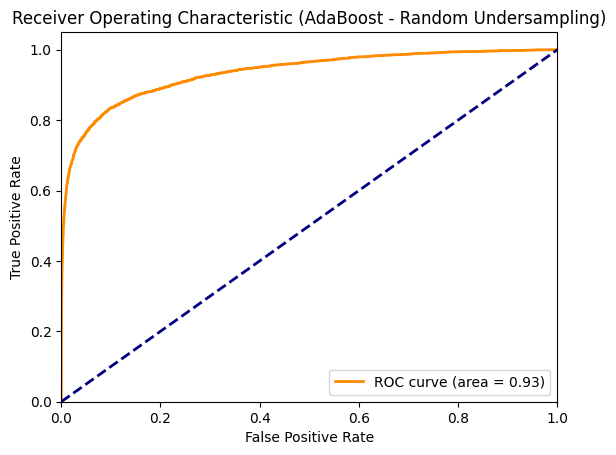

AdaBoost (Random Undersampling) - Train AUC-ROC Score: 1.0
AdaBoost (Random Undersampling) - Test AUC-ROC Score: 0.9348259716689157
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    104769
           1       0.35      0.77      0.48      3747

    accuracy                           0.94    108516
   macro avg       0.67      0.86      0.73    108516
weighted avg       0.97      0.94      0.95    108516



In [ ]:
y_train_pred_ada_rus = ada_rus.predict(X_train_rus)


y_train_prob_ada_rus = ada_rus.predict_proba(X_train_rus)[:, 1]
roc_auc_train_ada_rus = roc_auc_score(y_train_rus, y_train_prob_ada_rus)


y_test_pred_ada_rus = ada_rus.predict(X_test)


y_test_prob_ada_rus = ada_rus.predict_proba(X_test)[:, 1]
roc_auc_test_ada_rus = roc_auc_score(y_test, y_test_prob_ada_rus)


fpr_ada_rus, tpr_ada_rus, _ = roc_curve(y_test, y_test_prob_ada_rus)
plt.figure()
plt.plot(fpr_ada_rus, tpr_ada_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_ada_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()


print("AdaBoost (Random Undersampling) - Train AUC-ROC Score:", roc_auc_train_ada_rus)
print("AdaBoost (Random Undersampling) - Test AUC-ROC Score:", roc_auc_test_ada_rus)

print("Classification Report:")
print(classification_report(y_test, y_test_pred_ada_rus))

## SMOTE

In [ ]:
ada_smote = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42),n_estimators=100, random_state=42)
ada_smote.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=10,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

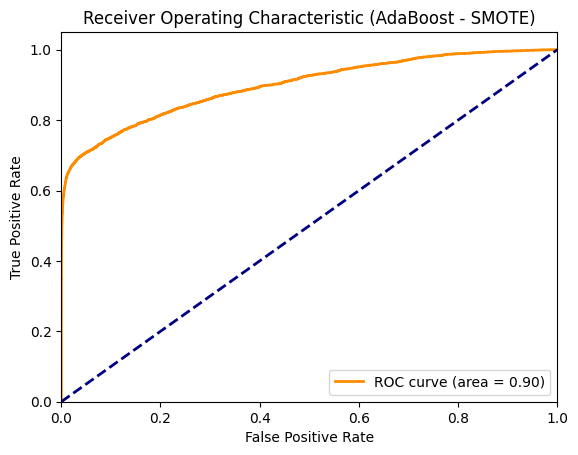

AdaBoost (SMOTE) - Train AUC-ROC Score: 0.9999999999772243
AdaBoost (SMOTE) - Test AUC-ROC Score: 0.8976407544792018
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104769
           1       0.84      0.58      0.69      3747

    accuracy                           0.98    108516
   macro avg       0.91      0.79      0.84    108516
weighted avg       0.98      0.98      0.98    108516



In [ ]:
y_train_pred_ada_smote = ada_smote.predict(X_train_smote)


y_train_prob_ada_smote = ada_smote.predict_proba(X_train_smote)[:, 1]
roc_auc_train_ada_smote = roc_auc_score(y_train_smote, y_train_prob_ada_smote)


y_test_pred_ada_smote = ada_smote.predict(X_test)


y_test_prob_ada_smote = ada_smote.predict_proba(X_test)[:, 1]
roc_auc_test_ada_smote = roc_auc_score(y_test, y_test_prob_ada_smote)


fpr_ada_smote, tpr_ada_smote, _ = roc_curve(y_test, y_test_prob_ada_smote)
plt.figure()
plt.plot(fpr_ada_smote, tpr_ada_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_ada_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost - SMOTE)')
plt.legend(loc="lower right")
plt.show()


print("AdaBoost (SMOTE) - Train AUC-ROC Score:", roc_auc_train_ada_smote)
print("AdaBoost (SMOTE) - Test AUC-ROC Score:", roc_auc_test_ada_smote)

print("Classification Report:")
print(classification_report(y_test, y_test_pred_ada_smote))

## Hyperparameter Tunning

In [ ]:
ada_model_rus = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42), random_state=42)

param_dist = {
    'n_estimators': list(range(50,350,50)),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
}


rs_rus = RandomizedSearchCV(estimator=ada_model_rus, param_distributions=param_dist,
                            scoring='roc_auc', cv=5, n_iter=10, refit=True, random_state=42, n_jobs=-1)


rs_rus.fit(X_train_rus, y_train_rus)


print("AdaBoost (Random Undersampling) - Best Parameters:", rs_rus.best_params_)
print("AdaBoost (Random Undersampling) - Best Train AUC-ROC Score:", rs_rus.best_score_)


y_pred_rus = rs_rus.best_estimator_.predict(X_test)
y_prob_rus = rs_rus.best_estimator_.predict_proba(X_test)[:, 1]


test_roc_auc_rus = roc_auc_score(y_test, y_prob_rus)


print("AdaBoost (Random Undersampling) - Test AUC-ROC Score:", test_roc_auc_rus)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_rus))

AdaBoost (Random Undersampling) - Best Parameters: {'n_estimators': 200, 'learning_rate': 1}
AdaBoost (Random Undersampling) - Best Train AUC-ROC Score: 0.9408312165352527
AdaBoost (Random Undersampling) - Test AUC-ROC Score: 0.9457753440070984
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    104769
           1       0.42      0.77      0.55      3747

    accuracy                           0.96    108516
   macro avg       0.71      0.87      0.76    108516
weighted avg       0.97      0.96      0.96    108516



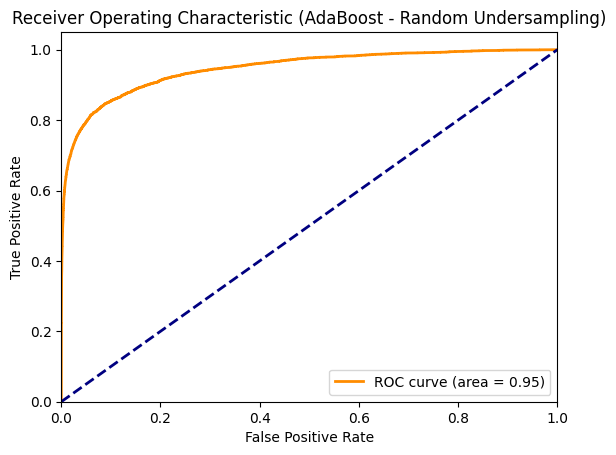

In [ ]:
fpr_ada_rus, tpr_ada_rus, _ = roc_curve(y_test, y_prob_rus)
plt.figure()
plt.plot(fpr_ada_rus, tpr_ada_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
ada = rs_rus.best_estimator_
feature_importance_ada = feature_importance(ada, X_train_rus)
print('Importances of features:')
print(feature_importance_ada)

Importances of features:
                 Importances
dist1           1.376384e-01
TransactionAmt  1.136731e-01
card1           1.132694e-01
card2           7.355156e-02
addr1           7.172693e-02
P_emaildomain   3.195666e-02
card5           2.245809e-02
id_02           1.798569e-02
D15             1.798144e-02
hour_warning    1.752994e-02
C13             1.402625e-02
D4              1.352555e-02
M5              1.234708e-02
D10             1.159336e-02
M6              1.081212e-02
D5              1.037037e-02
M4              1.032468e-02
card6           1.026758e-02
D11             1.012633e-02
id_20           1.011674e-02
D1              9.694502e-03
D3              9.356845e-03
C14             9.127652e-03
id_19           8.747583e-03
C2              7.828203e-03
V307            7.611408e-03
C6              7.583760e-03
R_emaildomain   6.926805e-03
card4           6.925166e-03
M8              6.688629e-03
C1              5.886944e-03
C11             5.624699e-03
M3              5.

# Gradient Boosting

## Random Undersampling

In [15]:
gb_rus = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=42)
gb_rus.fit(X_train_rus, y_train_rus)

GradientBoostingClassifier(max_depth=10, random_state=42)

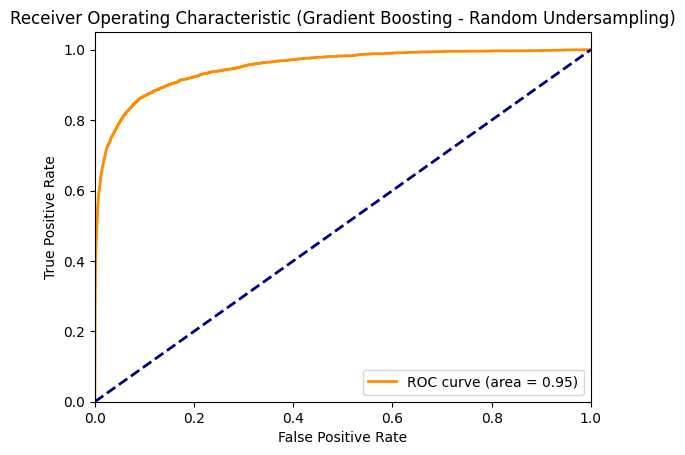

GradientBoosting (Random Undersampling) - Train AUC-ROC Score: 0.9960597460695064
GradientBoosting (Random Undersampling) - Test AUC-ROC Score: 0.9512338470521253
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    104769
           1       0.39      0.78      0.52      3747

    accuracy                           0.95    108516
   macro avg       0.69      0.87      0.75    108516
weighted avg       0.97      0.95      0.96    108516



In [16]:
y_train_pred_gb_rus = gb_rus.predict(X_train_rus)


y_train_prob_gb_rus = gb_rus.predict_proba(X_train_rus)[:, 1]
roc_auc_train_gb_rus = roc_auc_score(y_train_rus, y_train_prob_gb_rus)


y_test_pred_gb_rus = gb_rus.predict(X_test)


y_test_prob_gb_rus = gb_rus.predict_proba(X_test)[:, 1]
roc_auc_test_gb_rus = roc_auc_score(y_test, y_test_prob_gb_rus)


fpr_gb_rus, tpr_gb_rus, _ = roc_curve(y_test, y_test_prob_gb_rus)
plt.figure()
plt.plot(fpr_gb_rus, tpr_gb_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_gb_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()


print("GradientBoosting (Random Undersampling) - Train AUC-ROC Score:", roc_auc_train_gb_rus)
print("GradientBoosting (Random Undersampling) - Test AUC-ROC Score:", roc_auc_test_gb_rus)

print("Classification Report:")
print(classification_report(y_test, y_test_pred_gb_rus))

## SMOTE

In [ ]:
gb_smote = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=42)
gb_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(max_depth=10, random_state=42)

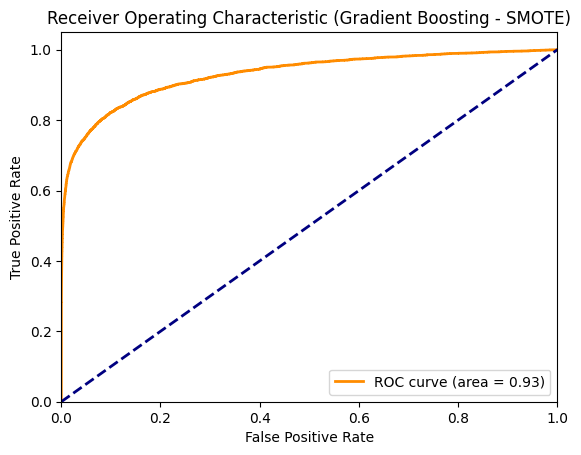

GradientBoosting (SMOTE) - Train AUC-ROC Score: 0.9970922370441537
GradientBoosting (SMOTE) - Test AUC-ROC Score: 0.9305043031584096
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    104769
           1       0.85      0.51      0.64      3747

    accuracy                           0.98    108516
   macro avg       0.91      0.75      0.81    108516
weighted avg       0.98      0.98      0.98    108516



In [ ]:
y_train_pred_gb_smote = gb_rus.predict(X_train_smote)


y_train_prob_gb_smote = gb_smote.predict_proba(X_train_smote)[:, 1]
roc_auc_train_gb_smote = roc_auc_score(y_train_smote, y_train_prob_gb_smote)


y_test_pred_gb_smote = gb_smote.predict(X_test)


y_test_prob_gb_smote = gb_smote.predict_proba(X_test)[:, 1]
roc_auc_test_gb_smote = roc_auc_score(y_test, y_test_prob_gb_smote)


fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_test_prob_gb_smote)
plt.figure()
plt.plot(fpr_gb_smote, tpr_gb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test_gb_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting - SMOTE)')
plt.legend(loc="lower right")
plt.show()


print("GradientBoosting (SMOTE) - Train AUC-ROC Score:", roc_auc_train_gb_smote)
print("GradientBoosting (SMOTE) - Test AUC-ROC Score:", roc_auc_test_gb_smote)

print("Classification Report:")
print(classification_report(y_test, y_test_pred_gb_smote))

## Hyperparameter Tunning

In [ ]:
gb_model_rus = GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=42)
param_dist = {
    'n_estimators': list(range(50,350,50)),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
}


rs_rus = RandomizedSearchCV(estimator=gb_model_rus, param_distributions=param_dist,
                            scoring='roc_auc', cv=5, n_iter=10, refit=True, random_state=42, n_jobs=-1)


rs_rus.fit(X_train_rus, y_train_rus)


print("GradientBoosting (Random Undersampling) - Best Parameters:", rs_rus.best_params_)
print("GradientBoosting (Random Undersampling) - Best Train AUC-ROC Score:", rs_rus.best_score_)


y_pred_rus = rs_rus.best_estimator_.predict(X_test)
y_prob_rus = rs_rus.best_estimator_.predict_proba(X_test)[:, 1]


test_roc_auc_rus = roc_auc_score(y_test, y_prob_rus)


print("GradientBoosting (Random Undersampling) - Test AUC-ROC Score:", test_roc_auc_rus)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_rus))

GradientBoosting (Random Undersampling) - Best Parameters: {'n_estimators': 300, 'learning_rate': 0.1}
GradientBoosting (Random Undersampling) - Best Train AUC-ROC Score: 0.9540660614049419
GradientBoosting (Random Undersampling) - Test AUC-ROC Score: 0.9598673195763736
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    104769
           1       0.43      0.81      0.56      3747

    accuracy                           0.96    108516
   macro avg       0.71      0.89      0.77    108516
weighted avg       0.97      0.96      0.96    108516



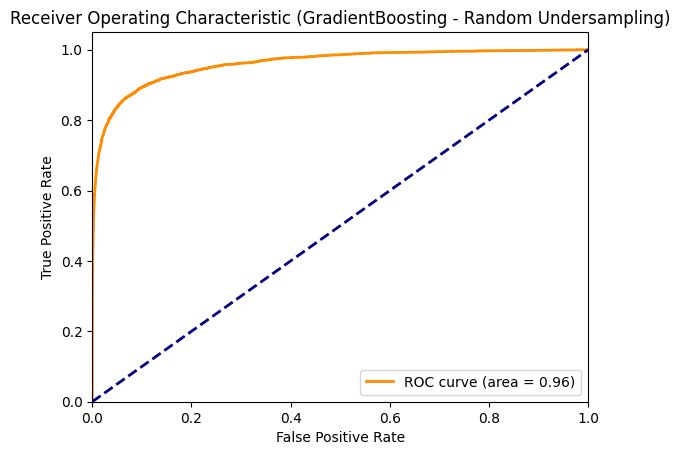

In [ ]:
fpr_ada_rus, tpr_ada_rus, _ = roc_curve(y_test, y_prob_rus)
plt.figure()
plt.plot(fpr_ada_rus, tpr_ada_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GradientBoosting - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
gb = rs_rus.best_estimator_
feature_importance_gb = feature_importance(gb, X_train_rus)
print('Importances of features:')
print(feature_importance_gb)

Importances of features:
                Importances
V258               0.154185
V294               0.074073
C14                0.059253
TransactionAmt     0.040249
card1              0.038331
dist1              0.031304
C1                 0.030282
card2              0.027559
addr1              0.024603
C8                 0.023117
C13                0.021071
D1                 0.018444
card6              0.015912
D15                0.015082
R_emaildomain      0.013865
D10                0.013840
V283               0.013777
P_emaildomain      0.013266
C2                 0.011952
C11                0.011837
C4                 0.011403
D3                 0.011394
C6                 0.010889
D4                 0.010262
C5                 0.010125
card5              0.010112
V70                0.009453
id_02              0.008427
D11                0.008197
V314               0.007804
V310               0.007577
V307               0.007482
card3              0.006516
D5                 0.00

# LightGBM

## Random Undersampling

In [50]:
lgb_under = LGBMClassifier(max_depth=15, class_weight = 'balanced', random_state=42, num_leaves = 1000)
lgb_under.fit(X_train_rus, y_train_rus)

[LightGBM] [Info] Number of positive: 14986, number of negative: 29972
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13783
[LightGBM] [Info] Number of data points in the train set: 44958, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

LGBMClassifier(class_weight='balanced', max_depth=15, num_leaves=1000,
               random_state=42)

In [51]:
yunder_pred_proba = lgb_under.predict_proba(X_test)[:,1]
yunder_pred = lgb_under.predict(X_test)
print(roc_auc_score(y_test, yunder_pred_proba))
print(classification_report(y_test,yunder_pred))

0.957812962024148
              precision    recall  f1-score   support

           0       0.99      0.94      0.97    104769
           1       0.33      0.84      0.48      3747

    accuracy                           0.94    108516
   macro avg       0.66      0.89      0.72    108516
weighted avg       0.97      0.94      0.95    108516



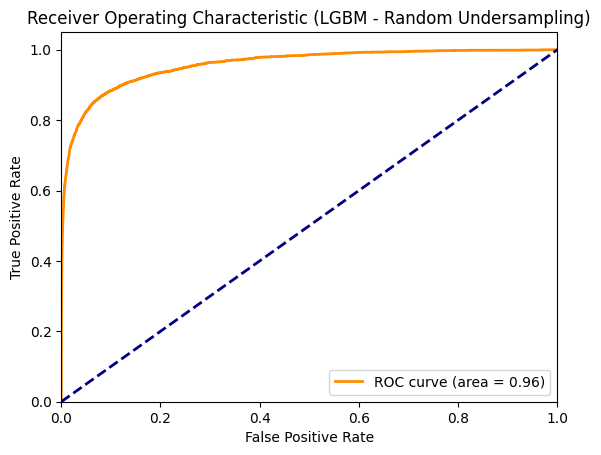

In [52]:
fpr_lgb_rus, tpr_lgb_rus, _ = roc_curve(y_test, yunder_pred_proba)
plt.figure()
plt.plot(fpr_lgb_rus, tpr_lgb_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, yunder_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LGBM - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()

## SMOTE

In [56]:
lgb_smote = LGBMClassifier(max_depth=15, class_weight = 'balanced', random_state=42, num_leaves = 1000)
lgb_smote.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 209539, number of negative: 419078
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.931952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40760
[LightGBM] [Info] Number of data points in the train set: 628617, number of used features: 196
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', max_depth=15, num_leaves=1000,
               random_state=42)

In [57]:
ysmote_pred_proba = lgb_smote.predict_proba(X_test)[:,1]
ysmote_pred = lgb_smote.predict(X_test)
print(roc_auc_score(y_test, ysmote_pred_proba))
print(classification_report(y_test,ysmote_pred))

0.9587753255161025
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104769
           1       0.89      0.60      0.71      3747

    accuracy                           0.98    108516
   macro avg       0.94      0.80      0.85    108516
weighted avg       0.98      0.98      0.98    108516



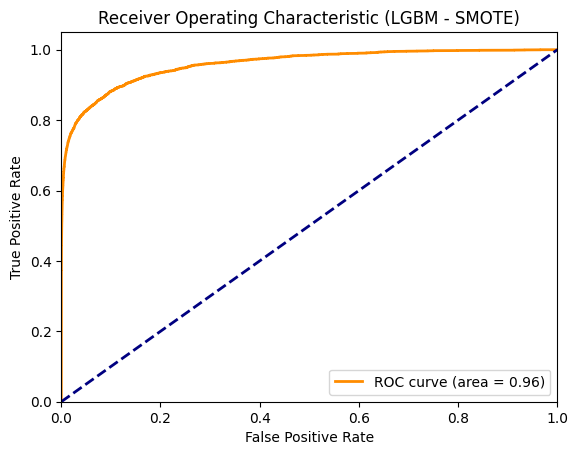

In [58]:
fpr_lgb_smote, tpr_lgb_smote, _ = roc_curve(y_test, ysmote_pred_proba)
plt.figure()
plt.plot(fpr_lgb_smote, tpr_lgb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, ysmote_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LGBM - SMOTE)')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tunning

In [59]:
lgb_model_rus = LGBMClassifier(max_depth=15, class_weight = 'balanced', random_state=42, num_leaves = 1000)
param_dist = {
    'n_estimators': list(range(50,350,50)),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
}


rs_rus = RandomizedSearchCV(estimator=lgb_model_rus, param_distributions=param_dist,
                            scoring='roc_auc', cv=5, n_iter=10, refit=True, random_state=42, n_jobs=-1)


rs_rus.fit(X_train_rus, y_train_rus)


print("LGBM (Random Undersampling) - Best Parameters:", rs_rus.best_params_)
print("LGBM (Random Undersampling) - Best Train AUC-ROC Score:", rs_rus.best_score_)


y_pred_rus = rs_rus.best_estimator_.predict(X_test)
y_prob_rus = rs_rus.best_estimator_.predict_proba(X_test)[:, 1]


test_roc_auc_rus = roc_auc_score(y_test, y_prob_rus)


print("LGBM (Random Undersampling) - Test AUC-ROC Score:", test_roc_auc_rus)

print("Classification Report for the Best Model:")
print(classification_report(y_test, y_pred_rus))

[LightGBM] [Info] Number of positive: 14986, number of negative: 29972
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13783
[LightGBM] [Info] Number of data points in the train set: 44958, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

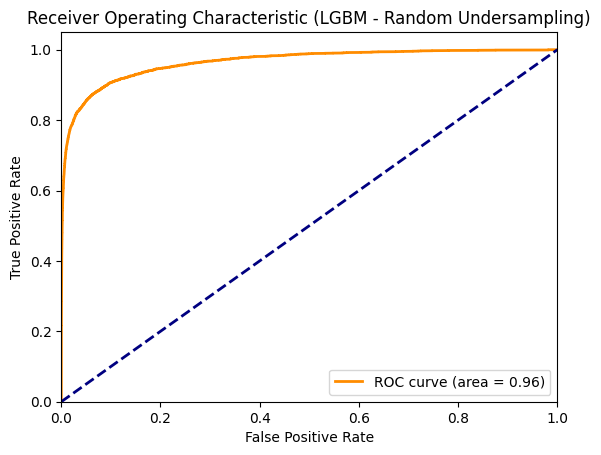

In [60]:
fpr_lgb_rus, tpr_lgb_rus, _ = roc_curve(y_test, y_prob_rus)
plt.figure()
plt.plot(fpr_lgb_rus, tpr_lgb_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_roc_auc_rus)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (LGBM - Random Undersampling)')
plt.legend(loc="lower right")
plt.show()

In [61]:
lgb = rs_rus.best_estimator_
feature_importance_lgb = feature_importance(lgb, X_train_rus)
print('Importances of features:')
print(feature_importance_lgb)

Importances of features:
                Importances
dist1                 12754
card1                 12624
TransactionAmt        12568
card2                  9370
addr1                  8592
D15                    4868
C13                    4855
D1                     4327
P_emaildomain          4223
D4                     3916
D10                    3734
id_02                  3583
card5                  3424
C1                     3055
D11                    2747
C2                     2648
V307                   2577
D5                     2359
id_20                  2348
D3                     2219
id_19                  1871
D8                     1770
C6                     1710
C11                    1639
V310                   1627
V127                   1517
C14                    1444
card6                  1279
id_06                  1250
R_emaildomain          1237
M6                     1194
C9                     1154
card4                  1090
M5                     

In [68]:
importaces = lgb.feature_importances_
#columns = df.drop(['isFraud'],axis = 1).columns.values
columns = list(feature_importance_lgb.index)
importaces.shape

(196,)

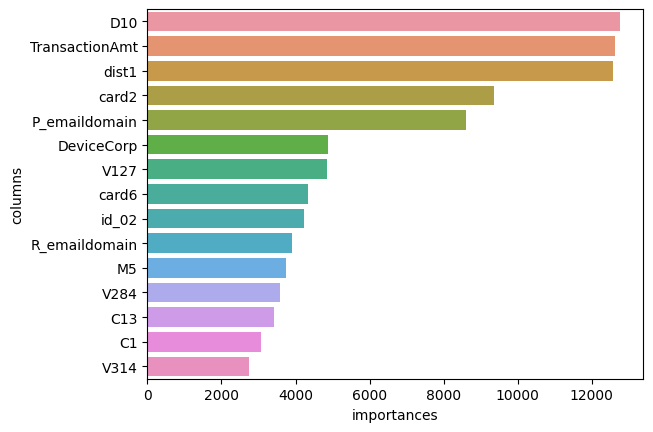

In [69]:
feature_importance = pd.DataFrame({
    'importances' : importaces,
    'columns' : columns
})

feature_importance.sort_values(by = 'importances',inplace=True,ascending=False)
tmp = feature_importance.iloc[:15,:]

sns.barplot(x='importances', y='columns', data=tmp, orient='h')
plt.show()